# Normality Tests In Python

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests.

In this tutorial, you will discover the importance of checking whether a data sample deviates from the normal distribution and a suite of techniques that you can use to evaluate your data sample.

## Project Overview:

This tutorial is divided into 5 parts; they are:

1. Normality Assumption
2. Test Dataset
3. Visual Normality Checks
4. Statistical Normality Tests


# Step-1: Normality Assumption:

A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian distribution.

If methods are used that assume a Gaussian distribution, and your data was drawn from a different distribution, the findings may be misleading or plain wrong.

There are a number of techniques that you can check if your data sample is Gaussian or sufficiently Gaussian-like to use the standard techniques, or sufficiently non-Gaussian to instead use non-parametric statistical methods.

This is a key decision point when it comes to choosing statistical methods for your data sample. We can summarize this decision as follows:

If Data Is Gaussian:
	Use Parametric Statistical Methods
Else:
	Use Nonparametric Statistical Methods

## Step-2: Test Dataset:

In [4]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


## Step-3: Visual Normality Checks:

We can create plots of the data to check whether it is Gaussian.

These checks are qualitative, so less accurate than the statistical methods we will calculate in the next section. Nevertheless, they are fast and like the statistical tests, must still be interpreted before you can make a call about your data sample.

In this section, we will look at two common methods for visually inspecting a dataset to check if it was drawn from a Gaussian distribution.The methods are as follows:

1. Histogram Plot
2. Quantile Quantile Plot

## Histogram Plot:

A simple and commonly used plot to quickly check the distribution of a sample of data is the histogram.

In the histogram, the data is divided into a pre-specified number of groups called bins. The data is then sorted into each bin and the count of the number of observations in each bin is retained.

The plot shows the bins across the x-axis maintaining their ordinal relationship, and the count in each bin on the y-axis.

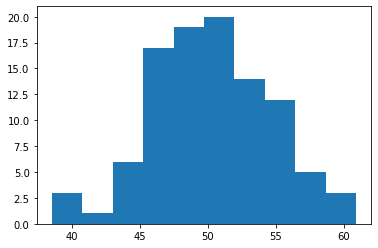

In [6]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data)
pyplot.show()

## Quantile-Quantile Test:

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

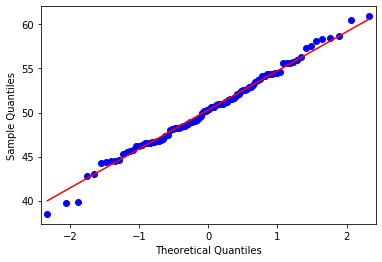

In [8]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
plt.show()

## Step-4: Statistical Normality Test:

The Test which we will be using is Shapiro-Wilk Test.
### Interpretation of a test:

Before you can apply the statistical tests, you must know how to interpret the results.

Each test will return at least two things:

Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.

p > alpha: fail to reject H0, normal.

This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

## Shapiro-Wilk Test:
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.Shapiro-Wilk Test:

In [9]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)
